In [16]:
import pandas as pd
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [12]:
from pathlib import Path
csvpath = Path('../Resources/yield.csv')
data = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [13]:
data.head()

,Yield
Date,
1971-08-16,0.5632
1971-08-17,0.7108
1971-08-18,1.0657
1971-08-19,1.1335
1971-08-20,1.0313


<AxesSubplot:xlabel='Date'>

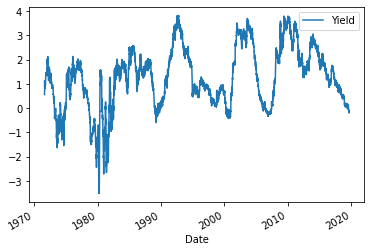

In [14]:
data.plot()

In [15]:
# Test to see if the data is stationary or non-stationary.
# Convert to stationary if needed.
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value:        %f ' % result[1])
print('Lags used:      %d' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print((key, value))

ADF Statistic: -3.393721
p-value:        0.011175 
Lags used:      31
Critical Values:
('1%', -3.430897660224935)
('5%', -2.861782037578331)
('10%', -2.566898831549907)


# Autocorrelation and Partial Autocorrelation Analysis

Use the autocorrelation and partial autocorrelation data to get a sense of how many lags to use in the ARMA model.

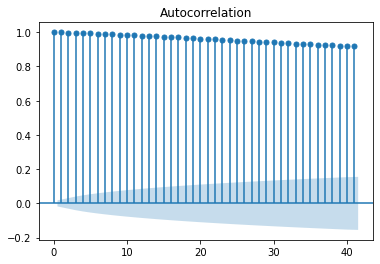

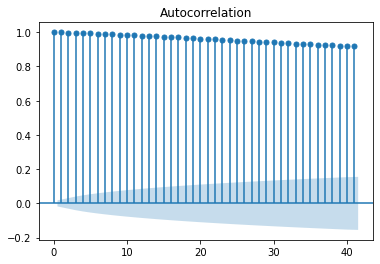

In [17]:
# Plot the autocorrelation of the yield data
plot_acf(data.Yield)

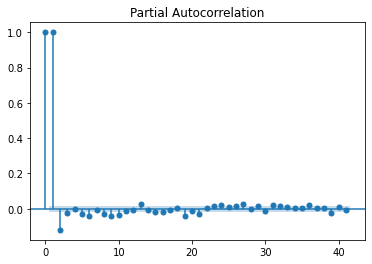

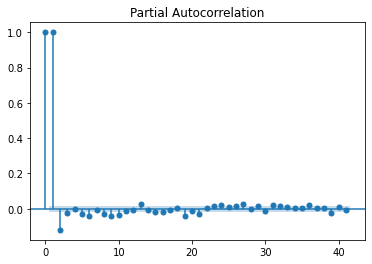

In [18]:
# Plot the partial autocorrelation of the yield data
sm.graphics.tsaplots.plot_pacf(data.Yield)

How many lags should be used in the ARMA model?

The autocorrelation plot shows that all lags could potentially be useful. 

However, the partial autocorrelation plot shows most of the trend is in the first two lags.

# ARMA Model

Create an ARMA model and fit it to the data. Output the summary table and take note of the p-values of the lags.

Plot the Forecast for the next 5 days of yield changes

In [27]:
from statsmodels.tsa.arima_model import ARMA
model=ARMA(data.values, order=(2,2))
result= model.fit()
result.summary()

/Users/enriquebriceno/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.44410D+00    |proj g|=  6.14886D-04

At iterate    5    f= -1.44420D+00    |proj g|=  2.58837D-04

At iterate   10    f= -1.44423D+00    |proj g|=  1.13134D-03

At iterate   15    f= -1.44423D+00    |proj g|=  8.32667D-06

At iterate   20    f= -1.44423D+00    |proj g|=  2.57572D-05

At iterate   25    f= -1.44423D+00    |proj g|=  1.02807D-05

At iterate   30    f= -1.44423D+00    |proj g|=  4.90719D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                11975
Model:                     ARMA(2, 2)   Log Likelihood               17294.672
Method:                       css-mle   S.D. of innovations              0.057
Date:                Mon, 14 Feb 2022   AIC                         -34577.344
Time:                        20:10:05   BIC                         -34533.001
Sample:                             0   HQIC                        -34562.468
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1822      0.318      3.713      0.000       0.558       1.806
ar.L1.y        1.9151      0.004    482.117      0.000       1.907       1.923
ar.L2.y       -0.9153      0.004   -230.806      0.000      -0.923      -0.908
ma.L1.y       -0.8033      0.010    -81.212      0.000      -0.823      -0.784
ma.L2.y       -0.0695      0.009     -7.675      0.000      -0.087      -0.052
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0025           +0.0000j            1.0025            0.0000
AR.2            1.0898           +0.0000j            1.0898            0.0000
MA.1            1.1338           +0.0000j            1.1338            0.0000
MA.2          -12.6962           +0.0000j           12.6962            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Forecast for Yield'}>

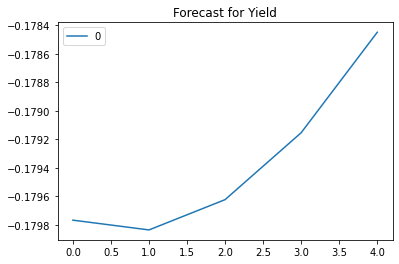

In [28]:
# Forecasting the future
pd.DataFrame(result.forecast(steps=5)[0]).plot(title="Forecast for Yield")